In [ ]:
# Tranfer learning 基于tranfer_data 建立MLP模式，实现数据迁移学习
# 实现y的预测，可视化结果
# 基于新数据tranfer_data2对模型进行二次训练对比表现
# 模型结构 MLP，两个隐藏层，每层50个神经元，激活函数relu,输出层激活函数linear,迭代次数100


In [4]:
# load the data 
import pandas as pd
data = pd.read_csv('tranfer_data.csv')
data.head()

,x,y
0,-5.0,25.00
1,-4.9,24.01
2,-4.8,23.04
3,-4.7,22.09
4,-4.6,21.16


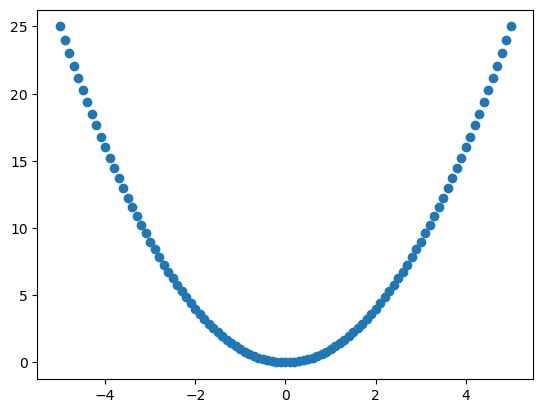

In [6]:
# visulize the data
x = data.loc[:,'x']
y = data.loc[:,'y']

from matplotlib import pyplot as plt
fig = plt.figure()
plt.scatter(x,y)
plt.show()

In [18]:
import numpy as np
x = np.array(x).reshape(-1,1)
print(x.shape,y.shape)

(101, 1) (101,)


In [13]:
# establish the MLP model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=50, input_dim = 1, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                100       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [24]:
# train the data
model.fit(x,y,epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1436
Epoch 2/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1568
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1502
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1361
Epoch 5/300
4/4 [==============================] - 0s 7ms/step - loss: 0.1351
Epoch 6/300
4/4 [==============================] - 0s 5ms/step - loss: 0.1383
Epoch 7/300
4/4 [==============================] - 0s 6ms/step - loss: 0.1353
Epoch 8/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1286
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1393
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1510
Epoch 11/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1336
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1295
Epoch 13/300
4/4 [==============================] - 0s 4ms/st

4/4 [==============================] - 0s 2ms/step


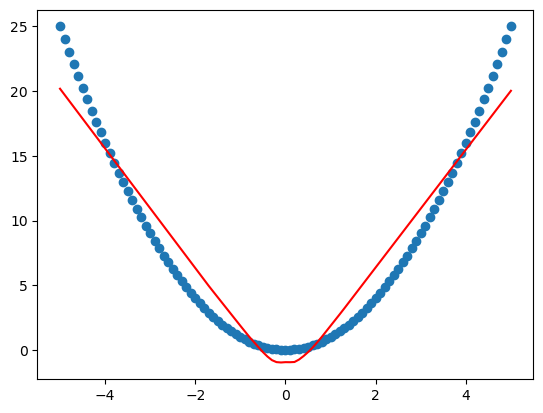

In [21]:
# visulize the prediction epooch =100
y_predict = model.predict(x)
fig1 = plt.figure()
plt.scatter(x,y)
plt.plot(x,y_predict,'r')
plt.show()

4/4 [==============================] - 0s 3ms/step


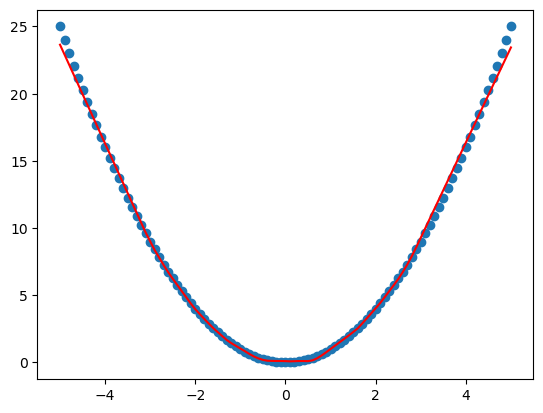

In [23]:
# visulize the prediction epooch =200
y_predict = model.predict(x)
fig2 = plt.figure()
plt.scatter(x,y)
plt.plot(x,y_predict,'r')
plt.show()

4/4 [==============================] - 0s 2ms/step


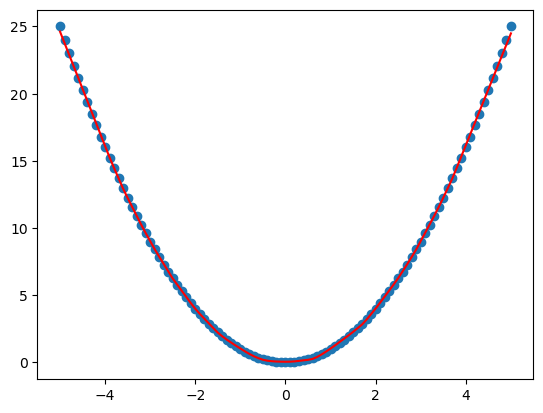

In [25]:
# visulize the prediction epooch =300
y_predict = model.predict(x)
fig3 = plt.figure()
plt.scatter(x,y)
plt.plot(x,y_predict,'r')
plt.show()

In [32]:
# save the model
import joblib
joblib.dump(model, 'model_MLP.joblib')

INFO:tensorflow:Assets written to: ram://09309205-69c4-4b7e-9c0b-49f901232164/assets


['model_MLP.joblib']

In [43]:
import os
current_dir = os.getcwd()
print(f"当前工作目录: {current_dir}")
file_path ='C:/Users/00036777/AI test project/model_MLP.joblib'

当前工作目录: C:\Users\00036777\AI test project


In [48]:
# load the model and data
# model1 = joblib.load('model_MLP.joblib') not work
model1 = model
data2 = pd.read_csv('tranfer_data2.csv')
data2.head()

,x,y
0,-5.0,25.00
1,-4.9,24.21
2,-4.8,23.44
3,-4.7,22.69
4,-4.6,21.96


In [58]:
# transfer learning
x2 = data2.loc[:,'x']
y2 = data2.loc[:,'y']
x2 = np.array(x2).reshape(-1,1)
print(x2.shape,y2.shape)
model1.fit(x2,y2,epochs=30)

(101, 1) (101,)
Epoch 1/30
4/4 [==============================] - 0s 4ms/step - loss: 0.4266
Epoch 2/30
4/4 [==============================] - 0s 4ms/step - loss: 0.4054
Epoch 3/30
4/4 [==============================] - 0s 5ms/step - loss: 0.3956
Epoch 4/30
4/4 [==============================] - 0s 4ms/step - loss: 0.3551
Epoch 5/30
4/4 [==============================] - 0s 4ms/step - loss: 0.3318
Epoch 6/30
4/4 [==============================] - 0s 4ms/step - loss: 0.3265
Epoch 7/30
4/4 [==============================] - 0s 4ms/step - loss: 0.3004
Epoch 8/30
4/4 [==============================] - 0s 4ms/step - loss: 0.2805
Epoch 9/30
4/4 [==============================] - 0s 3ms/step - loss: 0.2617
Epoch 10/30
4/4 [==============================] - 0s 4ms/step - loss: 0.2535
Epoch 11/30
4/4 [==============================] - 0s 4ms/step - loss: 0.2443
Epoch 12/30
4/4 [==============================] - 0s 4ms/step - loss: 0.2402
Epoch 13/30
4/4 [==============================] - 0s 4ms

4/4 [==============================] - 0s 3ms/step


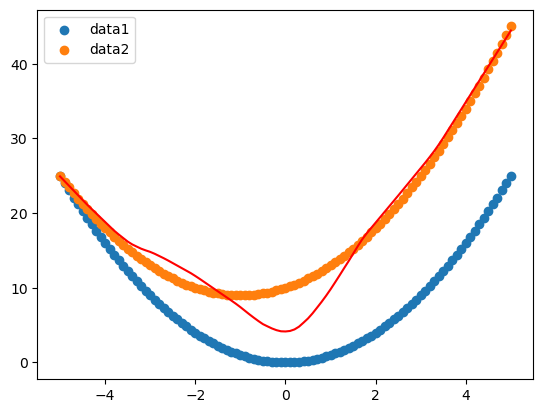

In [55]:
# visulize the prediction epooch =10
y2_predict = model1.predict(x2)
fig4 = plt.figure()
plt.scatter(x,y, label = 'data1')
plt.scatter(x2,y2, label = 'data2')
plt.plot(x,y2_predict,'r')
plt.legend()
plt.show()

4/4 [==============================] - 0s 3ms/step


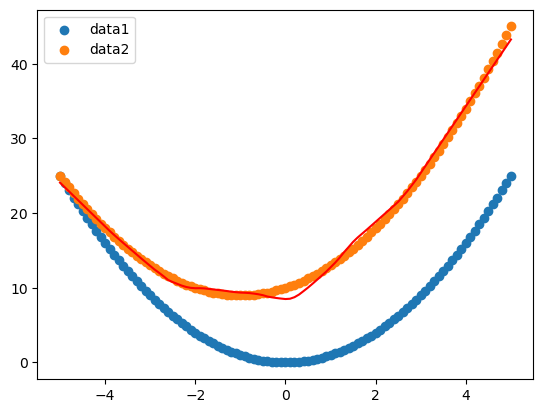

In [57]:
# visulize the prediction epooch =20
y2_predict = model1.predict(x2)
fig5 = plt.figure()
plt.scatter(x,y, label = 'data1')
plt.scatter(x2,y2, label = 'data2')
plt.plot(x,y2_predict,'r')
plt.legend()
plt.show()

4/4 [==============================] - 0s 2ms/step


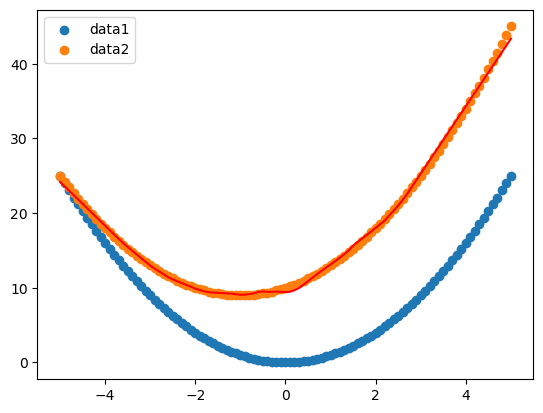

In [59]:
# visulize the prediction epooch =30
y2_predict = model1.predict(x2)
fig6 = plt.figure()
plt.scatter(x,y, label = 'data1')
plt.scatter(x2,y2, label = 'data2')
plt.plot(x,y2_predict,'r')
plt.legend()
plt.show()